<a href="https://colab.research.google.com/github/axellebersier/Urban_data_mining/blob/main/Data_description_2000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data Processing**


##Data description

Set up and load the data

In [124]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [125]:
import pandas as pd

url = 'https://github.com/axellebersier/Urban_data_mining/blob/main/Data/data_2000.xlsx?raw=true'
df_2020 = pd.read_excel(url)



##Data Description 2020

In [126]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2142 non-null   int64  
 1   Population        2142 non-null   float64
 2   dependency_ratio  2142 non-null   float64
 3   p_foreigners      2142 non-null   float64
 4   p_infrastructure  2142 non-null   float64
 5   p_forested        2142 non-null   float64
 6   p_agriculture     2142 non-null   float64
 7   p_improductible   2142 non-null   float64
 8   surface_polygone  2142 non-null   float64
 9   natural_growth    2142 non-null   float64
 10  p_migration       2142 non-null   float64
 11  p_surf_transport  2142 non-null   float64
 12  density           2142 non-null   float64
 13  p_pop_19          2142 non-null   float64
 14  p_pop_65          2142 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 251.1 KB


In [127]:
df_2020.describe()

,ID,Population,dependency_ratio,p_foreigners,p_infrastructure,p_forested,p_agriculture,p_improductible,surface_polygone,natural_growth,p_migration,p_surf_transport,density,p_pop_19,p_pop_65
count,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000
mean,3287.015873,3020.516706,66.971343,11.467692,0.136807,0.324231,0.472321,0.066550,1848.058632,2.842066,2.186966,4.020413,364.321516,25.327932,14.507807
std,2134.111655,10604.251549,11.017047,8.650242,0.139884,0.159759,0.190833,0.141474,3352.808145,7.133909,22.887662,3.645178,680.983980,3.866941,4.196830
min,1.000000,26.000000,37.452949,0.000000,0.001215,0.000000,0.000000,0.000000,31.000000,-93.023256,-184.615385,0.000000,0.910000,3.448276,2.500000
25%,1066.250000,556.250000,59.754339,4.932746,0.052528,0.205426,0.346983,0.003155,441.250000,0.000000,-9.345794,1.818541,67.955000,22.930240,11.687195
50%,3294.500000,1207.000000,65.870576,9.014563,0.089034,0.310109,0.489456,0.010811,831.000000,3.153154,1.035237,2.955761,151.820000,25.418718,14.143485
75%,5411.750000,2811.750000,73.313070,16.075314,0.172951,0.426732,0.620431,0.045745,1679.250000,6.469608,12.844392,4.959120,378.790000,27.852255,16.772445
max,6810.000000,337900.000000,133.682875,51.663942,0.966102,0.902913,0.916667,0.950813,43861.000000,44.444444,197.222222,38.901602,11171.630000,39.240506,50.000000


In [128]:
w_pop = df_2020.iloc[:, 1].tolist()  # the column of the population

w_surf = df_2020.iloc[:, 8].tolist() # the column of the surface

In [129]:
print(df_2020.columns)
#df_2020.drop('Population', axis=1, inplace=True)
#df_2020.drop('surface_polygone', axis=1, inplace=True)

Index(['ID', 'Population', 'dependency_ratio', 'p_foreigners',
       'p_infrastructure', 'p_forested', 'p_agriculture', 'p_improductible',
       'surface_polygone', 'natural_growth', 'p_migration', 'p_surf_transport',
       'density', 'p_pop_19', 'p_pop_65'],
      dtype='object')


In [130]:
df_2020.head()

,ID,Population,dependency_ratio,p_foreigners,p_infrastructure,p_forested,p_agriculture,p_improductible,surface_polygone,natural_growth,p_migration,p_surf_transport,density,p_pop_19,p_pop_65
0,1,1517.0,52.720079,5.735003,0.113780,0.310999,0.520860,0.053097,791.0,5.273566,11.881188,4.955527,195.20,24.222798,10.297927
1,2,9933.0,60.130415,25.974026,0.263456,0.284230,0.442871,0.004721,1059.0,3.724957,14.741765,6.509434,972.10,25.227846,12.323056
2,3,3896.0,48.701299,12.191992,0.135935,0.292059,0.570659,0.002692,743.0,9.240246,23.753589,5.234899,523.96,24.505523,8.245569
3,4,3038.0,61.616162,8.459513,0.113235,0.291176,0.572794,0.025735,1360.0,1.974984,-16.688482,4.459064,223.20,27.598684,10.526316
4,5,2994.0,64.250412,15.464262,0.173047,0.335375,0.485452,0.009188,653.0,5.010020,-3.680161,4.134763,458.04,28.084253,11.033099


In [131]:
df_ID =  df_2020.iloc[:,0]
df_2020 =  df_2020.iloc[:,1:]
#df_2020.drop('p_culture_institution', axis=1, inplace=True)
df_2020

,Population,dependency_ratio,p_foreigners,p_infrastructure,p_forested,p_agriculture,p_improductible,surface_polygone,natural_growth,p_migration,p_surf_transport,density,p_pop_19,p_pop_65
0,1517.000000,52.720079,5.735003,0.113780,0.310999,0.520860,0.053097,791.0,5.273566,11.881188,4.955527,195.200000,24.222798,10.297927
1,9933.000000,60.130415,25.974026,0.263456,0.284230,0.442871,0.004721,1059.0,3.724957,14.741765,6.509434,972.100000,25.227846,12.323056
2,3896.000000,48.701299,12.191992,0.135935,0.292059,0.570659,0.002692,743.0,9.240246,23.753589,5.234899,523.960000,24.505523,8.245569
3,3038.000000,61.616162,8.459513,0.113235,0.291176,0.572794,0.025735,1360.0,1.974984,-16.688482,4.459064,223.200000,27.598684,10.526316
4,2994.000000,64.250412,15.464262,0.173047,0.335375,0.485452,0.009188,653.0,5.010020,-3.680161,4.134763,458.040000,28.084253,11.033099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,565.000000,85.285285,8.849558,0.057923,0.377049,0.561749,0.002186,915.0,7.079646,-24.475524,1.851852,67.210000,25.283630,20.745543
2138,456.000000,75.329269,6.535513,0.066840,0.479601,0.442708,0.009115,2304.0,0.404300,-1.289454,2.653328,58.050000,23.736110,19.226336
2139,195.857143,80.396148,3.568109,0.034170,0.527287,0.424615,0.014251,6175.0,4.264995,10.804619,1.844063,22.260000,26.861034,17.420856
2140,244.200000,93.049369,3.037032,0.034938,0.399951,0.565111,0.000000,4093.0,2.806853,-6.393157,1.452202,29.256667,26.048107,21.712559


In [132]:
df_2020 = pd.DataFrame(df_2020)
corr_matrix_2020 = df_2020.corr()

In [133]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Population        2142 non-null   float64
 1   dependency_ratio  2142 non-null   float64
 2   p_foreigners      2142 non-null   float64
 3   p_infrastructure  2142 non-null   float64
 4   p_forested        2142 non-null   float64
 5   p_agriculture     2142 non-null   float64
 6   p_improductible   2142 non-null   float64
 7   surface_polygone  2142 non-null   float64
 8   natural_growth    2142 non-null   float64
 9   p_migration       2142 non-null   float64
 10  p_surf_transport  2142 non-null   float64
 11  density           2142 non-null   float64
 12  p_pop_19          2142 non-null   float64
 13  p_pop_65          2142 non-null   float64
dtypes: float64(14)
memory usage: 234.4 KB


##Description of the correlations for 2020

Correlation matrix

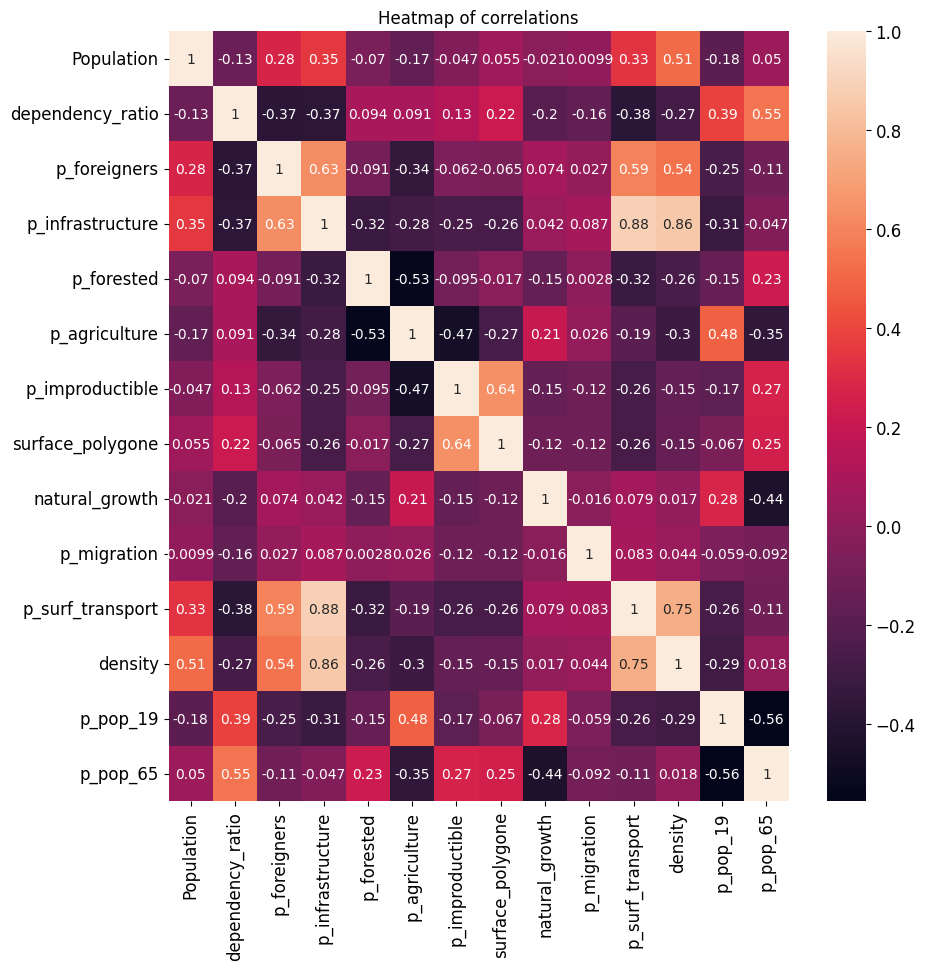

In [134]:
import seaborn as sn
import matplotlib.pyplot as plt

ax = sn.heatmap(corr_matrix_2020, annot=True)
plt.title("Heatmap of correlations")
plt.rcParams["figure.figsize"] = (30,50)
plt.show()


Principal component Analysis => cf code in R

Extract the data with the z-score 

In [135]:
#df_2020.to_csv('data_scaled_2000.csv', index = False, sep=',')

##Number of clusters

delete the weights

In [136]:
df_2020.drop('Population', axis=1, inplace=True)
df_2020.drop('surface_polygone', axis=1, inplace=True)

Silhouette score

set up to do a K-Means analysis

In [137]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Data preprocessing and standardization

In [138]:
from sklearn.preprocessing import StandardScaler
nostdf_2020 = df_2020

scaler = StandardScaler()
stdf_2020 = scaler.fit_transform(df_2020)

df_2020 = pd.DataFrame(stdf_2020,columns=nostdf_2020.columns)
print(df_2020)

      dependency_ratio  p_foreigners  p_infrastructure  p_forested  \
0            -1.293867     -0.662875         -0.164656   -0.082845   
1            -0.621085      1.677378          0.905595   -0.250439   
2            -1.658730      0.083751         -0.006235   -0.201424   
3            -0.486195     -0.347838         -0.168551   -0.206950   
4            -0.247032      0.462126          0.259133    0.069773   
...                ...           ...               ...         ...   
2137          1.662716     -0.302737         -0.564055    0.330690   
2138          0.758813     -0.570311         -0.500296    0.972754   
2139          1.218833     -0.913434         -0.733903    1.271316   
2140          2.367614     -0.974843         -0.728414    0.474077   
2141          0.915537     -0.946113         -0.658340    0.861684   

      p_agriculture  p_improductible  natural_growth  p_migration  \
0          0.254413        -0.095110        0.340917     0.423656   
1         -0.154360  

In [139]:
#df_2020['ID'] = df_ID
#df_2020.to_csv('data_scaled_2000.csv', index = False, sep=',')
#df_2020

,dependency_ratio,p_foreigners,p_infrastructure,p_forested,p_agriculture,p_improductible,natural_growth,p_migration,p_surf_transport,density,p_pop_19,p_pop_65,ID
0,-1.293867,-0.662875,-0.164656,-0.082845,0.254413,-0.095110,0.340917,0.423656,0.256595,-0.248407,-0.285857,-1.003344,1
1,-0.621085,1.677378,0.905595,-0.250439,-0.154360,-0.437131,0.123789,0.548668,0.682985,0.892709,-0.025888,-0.520693,2
2,-1.658730,0.083751,-0.006235,-0.201424,0.515434,-0.451481,0.897078,0.942502,0.333254,0.234478,-0.212727,-1.492484,3
3,-0.486195,-0.347838,-0.168551,-0.206950,0.526623,-0.288562,-0.121572,-0.824892,0.120366,-0.207280,0.587359,-0.948912,4
4,-0.247032,0.462126,0.259133,0.069773,0.068825,-0.405550,0.303965,-0.256404,0.031377,0.137654,0.712958,-0.828129,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,1.662716,-0.302737,-0.564055,0.330690,0.468729,-0.455059,0.594144,-1.165201,-0.595051,-0.436399,-0.011459,1.486644,6806
2138,0.758813,-0.570311,-0.500296,0.972754,-0.155210,-0.406071,-0.341795,-0.151926,-0.375127,-0.449854,-0.411745,1.124570,6807
2139,1.218833,-0.913434,-0.733903,1.271316,-0.250043,-0.369756,0.199507,0.376608,-0.597188,-0.502422,0.396556,0.694269,6808
2140,2.367614,-0.974843,-0.728414,0.474077,0.486353,-0.470512,-0.004937,-0.374967,-0.704715,-0.492145,0.186283,1.717114,6809


Determination of the parameters and the number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

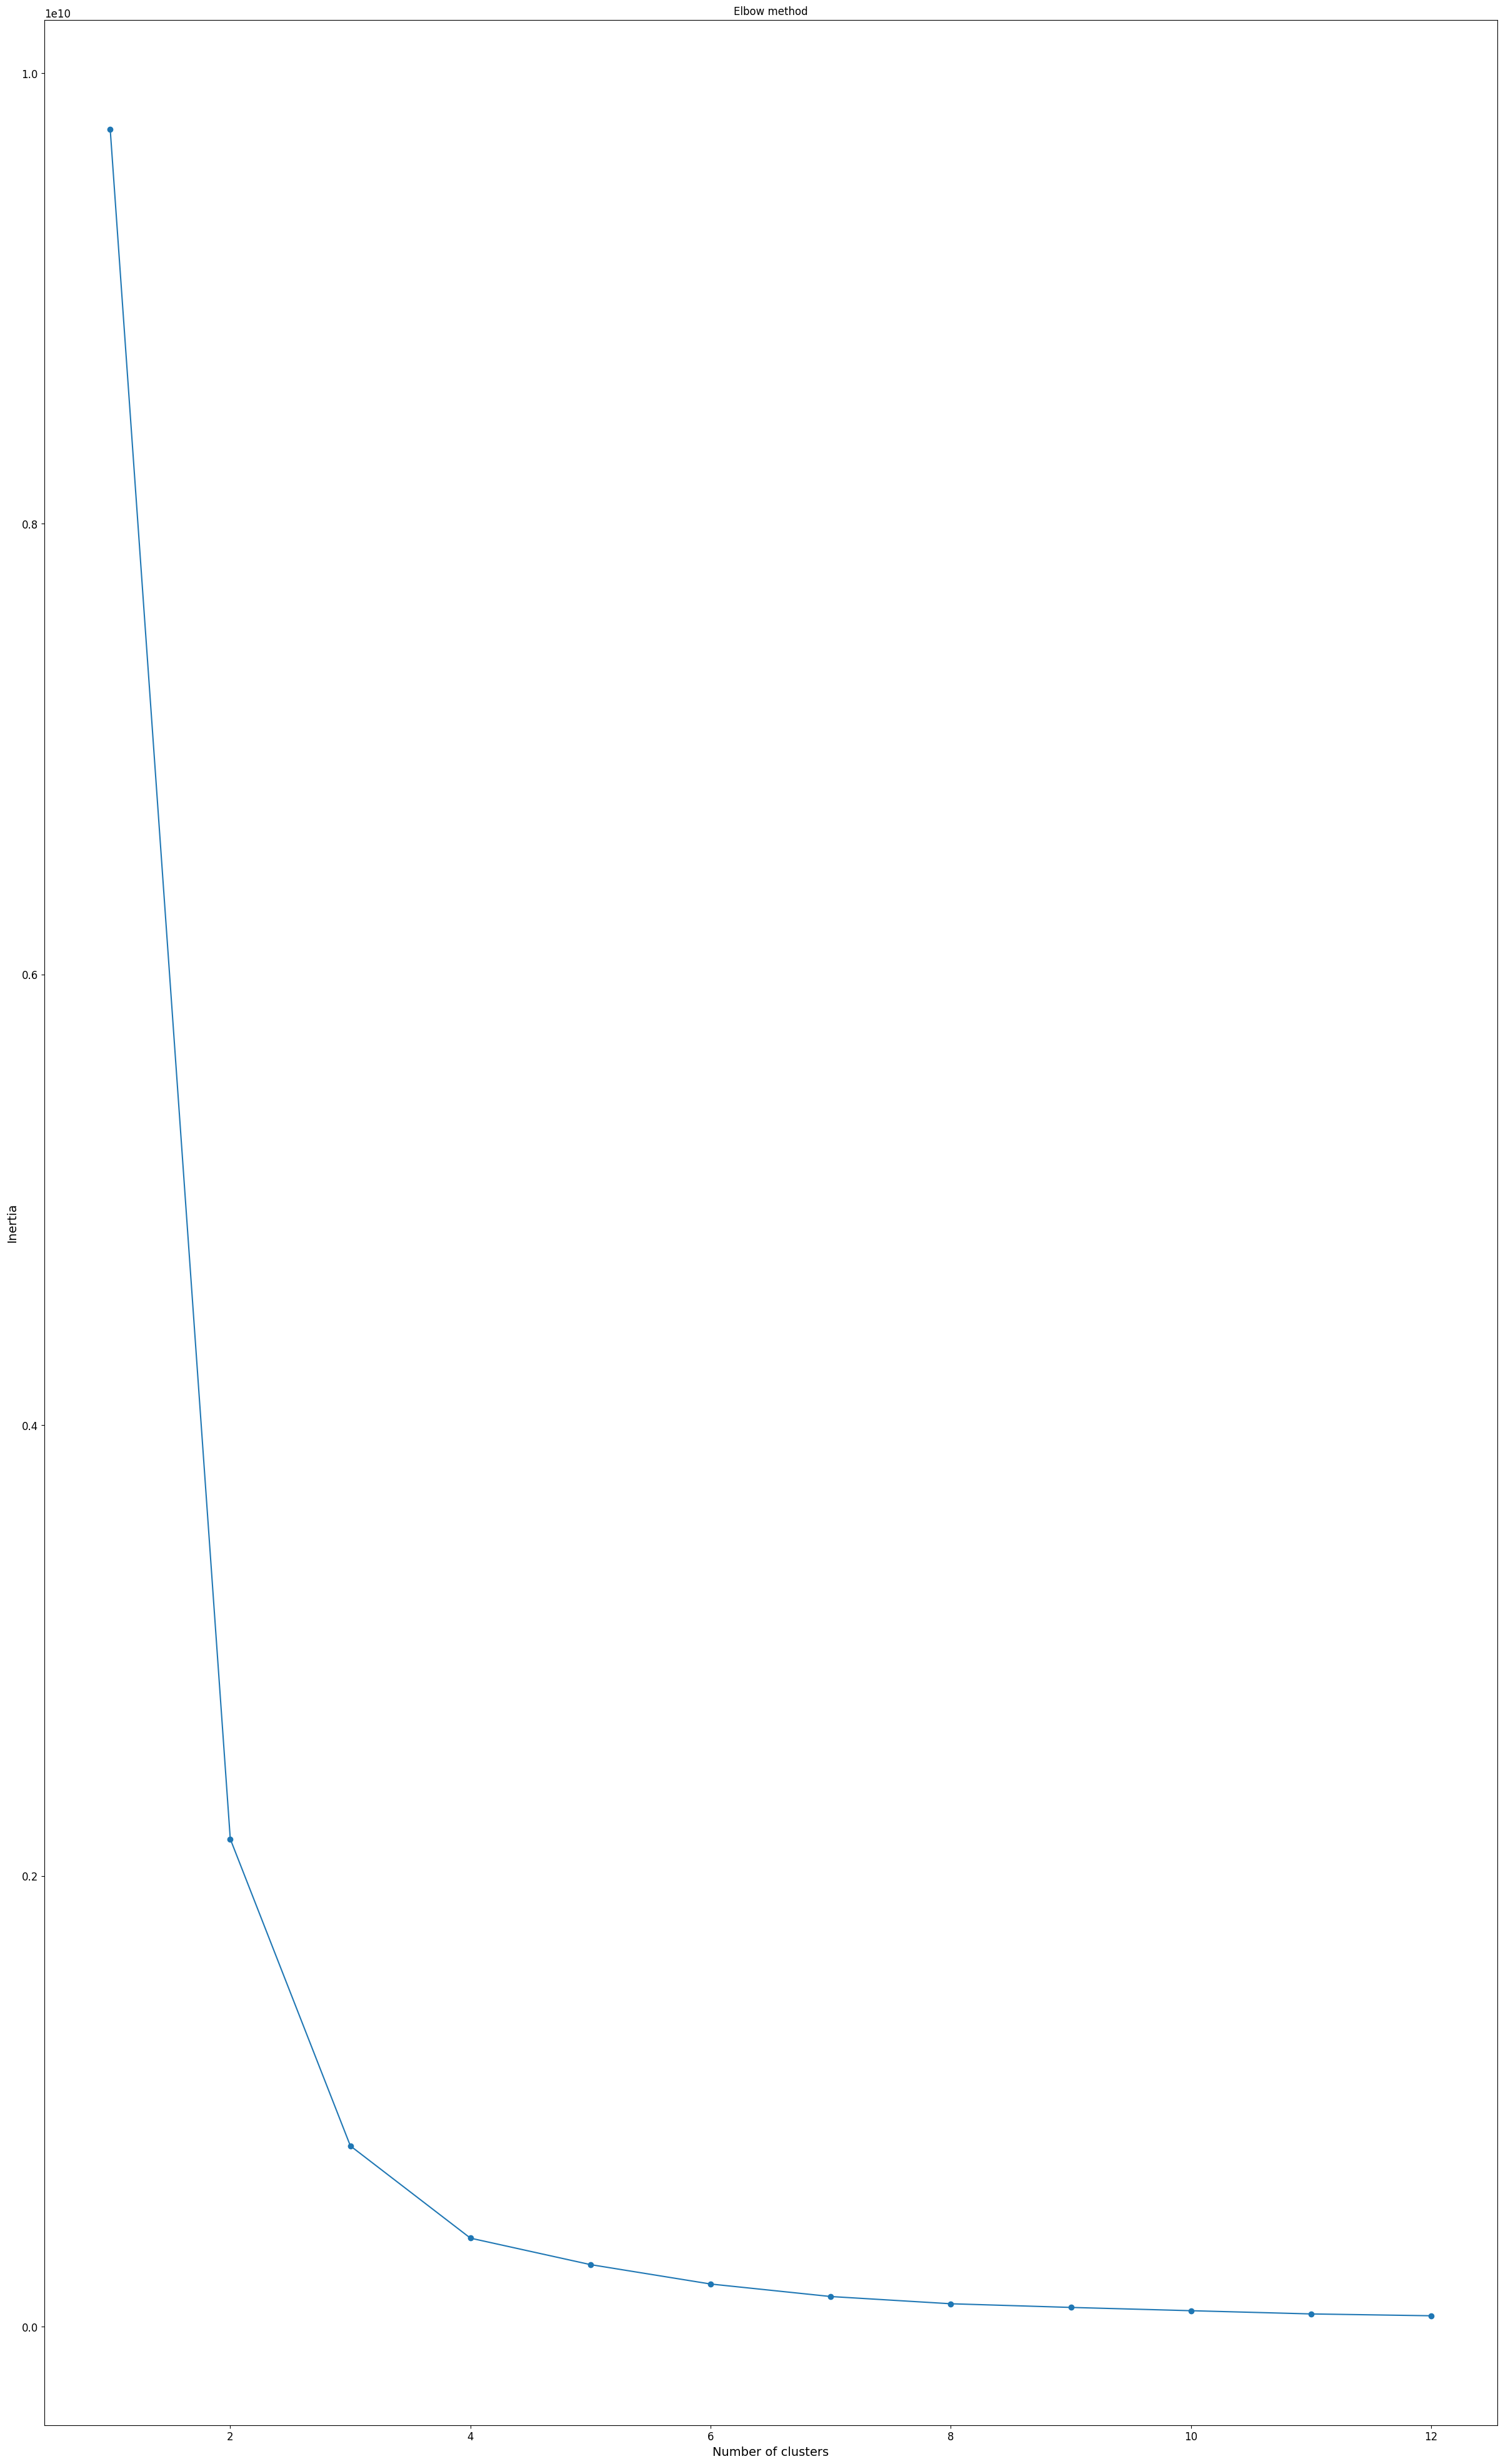

In [140]:
from sklearn.cluster import KMeans

df_2020 = np.nan_to_num(df_2020, nan=0)

inertias = []

for i in range(1,13):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_2020)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,13), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)

In [141]:
silhouette_ann= []
for num_clusters in range(2,10):
  # initialise kmeans
  kmeans = KMeans(num_clusters)
  kmeans.fit(df_2020)
  cluster_labels = kmeans.labels_
  
# silhouette score
  silhouette_ann.append(silhouette_score(df_2020, cluster_labels))
silhouette_ann

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.6553931348008579,
 0.665788738395038,
 0.6742691727090607,
 0.6523615616261612,
 0.6109788602591743,
 0.6081331435691041,
 0.6049115467597606,
 0.5908073436688559]

In [142]:
num_clusters

9

In [143]:
Ncluster = range(1,num_clusters)
Ncluster
silhouette_ann

[0.6553931348008579,
 0.665788738395038,
 0.6742691727090607,
 0.6523615616261612,
 0.6109788602591743,
 0.6081331435691041,
 0.6049115467597606,
 0.5908073436688559]

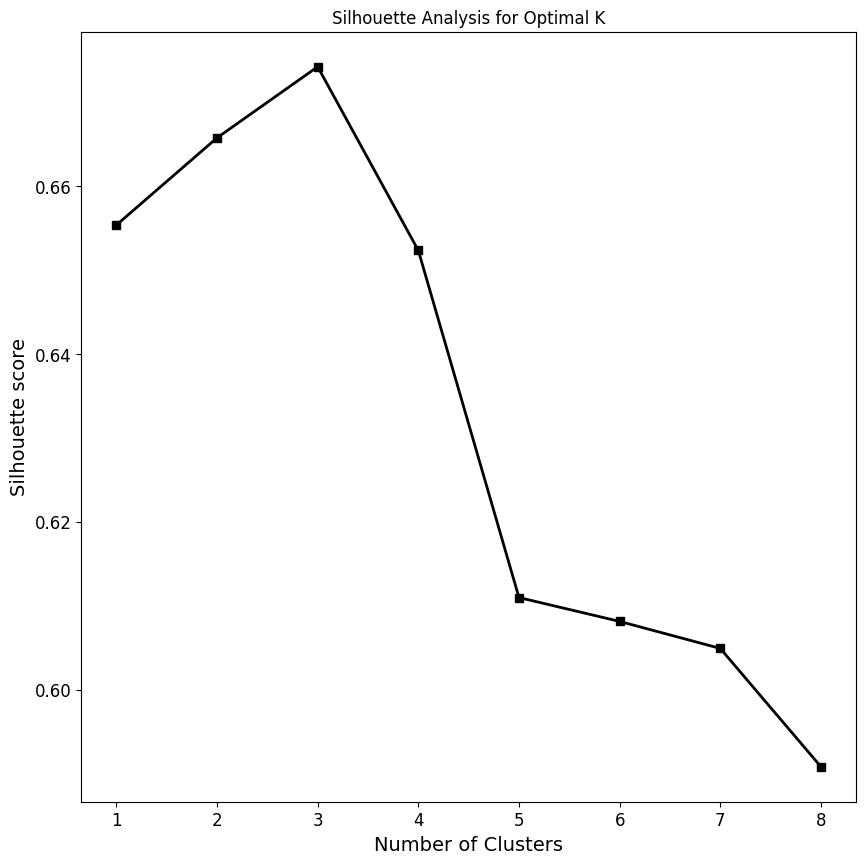

In [144]:
plt.plot(Ncluster,silhouette_ann,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis for Optimal K')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)

In [145]:
df_2020 = pd.DataFrame(df_2020)

In [146]:
df_2020

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.293867,-0.662875,-0.164656,-0.082845,0.254413,-0.095110,0.340917,0.423656,0.256595,-0.248407,-0.285857,-1.003344,1.0
1,-0.621085,1.677378,0.905595,-0.250439,-0.154360,-0.437131,0.123789,0.548668,0.682985,0.892709,-0.025888,-0.520693,2.0
2,-1.658730,0.083751,-0.006235,-0.201424,0.515434,-0.451481,0.897078,0.942502,0.333254,0.234478,-0.212727,-1.492484,3.0
3,-0.486195,-0.347838,-0.168551,-0.206950,0.526623,-0.288562,-0.121572,-0.824892,0.120366,-0.207280,0.587359,-0.948912,4.0
4,-0.247032,0.462126,0.259133,0.069773,0.068825,-0.405550,0.303965,-0.256404,0.031377,0.137654,0.712958,-0.828129,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,1.662716,-0.302737,-0.564055,0.330690,0.468729,-0.455059,0.594144,-1.165201,-0.595051,-0.436399,-0.011459,1.486644,6806.0
2138,0.758813,-0.570311,-0.500296,0.972754,-0.155210,-0.406071,-0.341795,-0.151926,-0.375127,-0.449854,-0.411745,1.124570,6807.0
2139,1.218833,-0.913434,-0.733903,1.271316,-0.250043,-0.369756,0.199507,0.376608,-0.597188,-0.502422,0.396556,0.694269,6808.0
2140,2.367614,-0.974843,-0.728414,0.474077,0.486353,-0.470512,-0.004937,-0.374967,-0.704715,-0.492145,0.186283,1.717114,6809.0


Implement a weighted K-means


In [147]:
df_2020_K = df_2020

1. K-means without weight

In [148]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_2020)
print(kmeans)

y_kmean_3 = kmeans.predict(df_2020)

KMeans(n_clusters=3)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [149]:
df_2020

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.293867,-0.662875,-0.164656,-0.082845,0.254413,-0.095110,0.340917,0.423656,0.256595,-0.248407,-0.285857,-1.003344,1.0
1,-0.621085,1.677378,0.905595,-0.250439,-0.154360,-0.437131,0.123789,0.548668,0.682985,0.892709,-0.025888,-0.520693,2.0
2,-1.658730,0.083751,-0.006235,-0.201424,0.515434,-0.451481,0.897078,0.942502,0.333254,0.234478,-0.212727,-1.492484,3.0
3,-0.486195,-0.347838,-0.168551,-0.206950,0.526623,-0.288562,-0.121572,-0.824892,0.120366,-0.207280,0.587359,-0.948912,4.0
4,-0.247032,0.462126,0.259133,0.069773,0.068825,-0.405550,0.303965,-0.256404,0.031377,0.137654,0.712958,-0.828129,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,1.662716,-0.302737,-0.564055,0.330690,0.468729,-0.455059,0.594144,-1.165201,-0.595051,-0.436399,-0.011459,1.486644,6806.0
2138,0.758813,-0.570311,-0.500296,0.972754,-0.155210,-0.406071,-0.341795,-0.151926,-0.375127,-0.449854,-0.411745,1.124570,6807.0
2139,1.218833,-0.913434,-0.733903,1.271316,-0.250043,-0.369756,0.199507,0.376608,-0.597188,-0.502422,0.396556,0.694269,6808.0
2140,2.367614,-0.974843,-0.728414,0.474077,0.486353,-0.470512,-0.004937,-0.374967,-0.704715,-0.492145,0.186283,1.717114,6809.0


In [150]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df_2020)
y_kmean_7 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2. K-Means avec weighted pop

In [151]:
kmeans = KMeans(n_clusters=3)
weights = w_pop
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
y_kmean_pop_3 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [152]:
kmeans = KMeans(n_clusters=7)
weights = w_pop
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
y_kmean_pop_7 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3. K-Means with weight on the surface

In [153]:
kmeans = KMeans(n_clusters=3)
weights = w_surf
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
print(kmeans)
y_kmean_surf_3 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)


In [154]:
kmeans = KMeans(n_clusters=7)
weights = w_surf
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
y_kmean_surf_7 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [155]:
df_2020['cluster_3']= y_kmean_3
df_2020['cluster_7']= y_kmean_7
df_2020['cluster_pop_3']= y_kmean_pop_3
df_2020['cluster_pop_7']= y_kmean_pop_7
df_2020['cluster_surf_3']= y_kmean_surf_3
df_2020['cluster_surf_7']= y_kmean_surf_7

In [156]:
df_2020

,0,1,2,3,4,5,6,7,8,9,10,11,12,cluster_3,cluster_7,cluster_pop_3,cluster_pop_7,cluster_surf_3,cluster_surf_7
0,-1.293867,-0.662875,-0.164656,-0.082845,0.254413,-0.095110,0.340917,0.423656,0.256595,-0.248407,-0.285857,-1.003344,1.0,1,4,2,3,0,1
1,-0.621085,1.677378,0.905595,-0.250439,-0.154360,-0.437131,0.123789,0.548668,0.682985,0.892709,-0.025888,-0.520693,2.0,1,4,2,3,0,1
2,-1.658730,0.083751,-0.006235,-0.201424,0.515434,-0.451481,0.897078,0.942502,0.333254,0.234478,-0.212727,-1.492484,3.0,1,4,2,3,0,1
3,-0.486195,-0.347838,-0.168551,-0.206950,0.526623,-0.288562,-0.121572,-0.824892,0.120366,-0.207280,0.587359,-0.948912,4.0,1,4,2,3,0,1
4,-0.247032,0.462126,0.259133,0.069773,0.068825,-0.405550,0.303965,-0.256404,0.031377,0.137654,0.712958,-0.828129,5.0,1,4,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,1.662716,-0.302737,-0.564055,0.330690,0.468729,-0.455059,0.594144,-1.165201,-0.595051,-0.436399,-0.011459,1.486644,6806.0,0,3,1,5,1,4
2138,0.758813,-0.570311,-0.500296,0.972754,-0.155210,-0.406071,-0.341795,-0.151926,-0.375127,-0.449854,-0.411745,1.124570,6807.0,0,3,1,5,1,4
2139,1.218833,-0.913434,-0.733903,1.271316,-0.250043,-0.369756,0.199507,0.376608,-0.597188,-0.502422,0.396556,0.694269,6808.0,0,3,1,5,1,4
2140,2.367614,-0.974843,-0.728414,0.474077,0.486353,-0.470512,-0.004937,-0.374967,-0.704715,-0.492145,0.186283,1.717114,6809.0,0,3,1,5,1,4


3. Kmeans en fonction du PCA

In [157]:
nostdf_2020 #avec les valeurs non-standardisées 

,dependency_ratio,p_foreigners,p_infrastructure,p_forested,p_agriculture,p_improductible,natural_growth,p_migration,p_surf_transport,density,p_pop_19,p_pop_65
0,52.720079,5.735003,0.113780,0.310999,0.520860,0.053097,5.273566,11.881188,4.955527,195.200000,24.222798,10.297927
1,60.130415,25.974026,0.263456,0.284230,0.442871,0.004721,3.724957,14.741765,6.509434,972.100000,25.227846,12.323056
2,48.701299,12.191992,0.135935,0.292059,0.570659,0.002692,9.240246,23.753589,5.234899,523.960000,24.505523,8.245569
3,61.616162,8.459513,0.113235,0.291176,0.572794,0.025735,1.974984,-16.688482,4.459064,223.200000,27.598684,10.526316
4,64.250412,15.464262,0.173047,0.335375,0.485452,0.009188,5.010020,-3.680161,4.134763,458.040000,28.084253,11.033099
...,...,...,...,...,...,...,...,...,...,...,...,...
2137,85.285285,8.849558,0.057923,0.377049,0.561749,0.002186,7.079646,-24.475524,1.851852,67.210000,25.283630,20.745543
2138,75.329269,6.535513,0.066840,0.479601,0.442708,0.009115,0.404300,-1.289454,2.653328,58.050000,23.736110,19.226336
2139,80.396148,3.568109,0.034170,0.527287,0.424615,0.014251,4.264995,10.804619,1.844063,22.260000,26.861034,17.420856
2140,93.049369,3.037032,0.034938,0.399951,0.565111,0.000000,2.806853,-6.393157,1.452202,29.256667,26.048107,21.712559


1. importer les valeurs 


In [158]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_2020) #valeurs PCA ===> en fonction des scores 
print(kmeans)

y_kmean = kmeans.predict(df_2020)
df_2020_K['cluster']= y_kmean

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)


In [159]:
df_2020.to_csv('data_kmeansweighted.csv', index = False, sep=',')

## Self-Organizing Map algorithm